In [1]:
from O.interface import *

2025-06-05 14:03:45.506129: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-05 14:03:46.464226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749153826.727418   71946 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749153826.795418   71946 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749153827.577172   71946 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# training on a laptop with CPU

In [2]:
# this dataset (veliparib_dataset_I_NVT_cell_111_CUT) will be included in the slightly larger version of repository 
# (that version of repository downloadable via the link in FEcrys/'About'; TODO)

# this dataset only has 60,000 MD samples, that are split 4:1 for training:validation, so only 48,000 training examples.

nn = NN_interface_sc_multimap(
                name = 'veliparib_I_111_trying_small_dataset',
                paths_datasets = ['./O/MM/GAFF_sc/veliparib/data/veliparib_dataset_I_NVT_cell_111_CUT',],
                running_in_notebook = True,
                training = True,
                model_class = PGMcrys_v1,
                )

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/GAFF_sc/veliparib/veliparib_I_equilibrated_cell_111.pdb
n_molecules: 8

# initialise_system:
set PME cutoff to: 0.36 nm
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /home/aidan/research/sim_files/FEcrys/O/MM/GAFF_sc/veliparib/misc/x_veliparib_gmx.top
replaced 1 line ( 399 ) 
 from: 
     UNK                  1
 to 
     UNK                  8
these changes were written into file: /home/aidan/research/sim_files/FEcrys/O/MM/GAFF_sc/veliparib/misc/x_x_veliparib_gmx.top
__________________________________________________________

set SwitchingFunction to 0.95 * PME_cutoff = 0.34199999999999997 nm
adjusted EwaldErrorTolerance from 0.0005 to 0.0001
n_mol =  8, n_atoms_mol = 34, N = 272, n_DOF = 813 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
min

In [3]:
nn.set_ic_map_step1(ind_root_atom=5, option=0)

molecule with 34 atoms, of which 18 are heavy atoms, and the rest are 16 hydrogens.
atoms with incides [5, 10, 1] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 5
rotation of the molecule specified by atoms with indices: [10, 1]
conformation of the molecule specified by all other atoms.


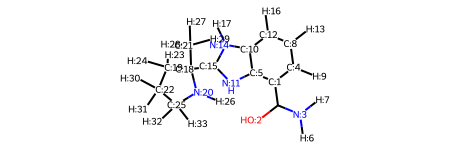

In [4]:
# [5, 10, 1] are carbon atoms of the large ring: 
# this is a user-defined choice, can by any rigid section of the molecule
# can try other options, and then absolute FEs might be slightly different, but FE difference within same n_mol should be the same.
nn.nns[0].sc.mol

In [5]:
nn.set_ic_map_step2(check_PES=True)

COM removed from data without taking into account PBC of the box
inds_rand attempt: 1
! not found
inds_rand attempt: 2
found !
checking that PES matches the sampled dataset:
errT: 1.5081793454555736e-05 -0.0043772606027800975 0.00427302717653788
errV: -1.2586200839734828e-05 -0.004112858527832941 0.003701898812437321


In [6]:
# ! a much smaller dataset than used in the paper
# expecting overfitting to be quite rapid, while using a similar sized model.

nn.nns[0].r.shape, nn.nns[0].r_training.shape, nn.nns[0].r_validation.shape

((60000, 272, 3), (48000, 272, 3), (12000, 272, 3))

In [7]:
# n_mol_unitcells is another user choice in this version (default ic_map slightly different from the paper)

# the numbers printed below could be more informative, but in this case means that the methyl group hydrogens
# have three torsions, that are unconstrained in all molecules (model needs to learn not to clash them)

nn.set_ic_map_step3(n_mol_unitcells=[8,])

initialising on 60000 datapoints provided
SCmap.initalise_ : a single box provided -> Cartesian transformed by SCmap.
3 out of 248 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

0 out of 8 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

ic_map inversion errors on a small random batch:
positons: 6.017089e-05
volume: 0.00024414062
!! 1.0001036


In [8]:
nn.set_model(n_layers = 4, learning_rate=0.001, n_att_heads=4, evaluation_batch_size=5000)

# inv_test outputs are explained inside the code
# this output doesn't look ideal for the start of training (the last 3 numbers a bit high for this small system), but its fine here.

self.n_att_heads: 4
There are 9423080 trainable parameters in this model, among 324 trainable weights.
[To see dimensionalities of the trainable weights print(list(self.shapes_trainable_weights)).] 
inv_test_res0 ([[np.float32(6.8494164e-06), np.float32(8.2850456e-05)], [np.float32(-8.881836e-05), np.float32(-0.006591797), np.float32(0.0073242188)]], [[[np.float32(0.00047567143), np.float32(0.016153902)], [np.float32(5.1418727e-05), np.float32(1.999953)]], [np.float32(-0.000876416), np.float32(-0.1652832), np.float32(0.123535156)]])


In [ ]:
''' training this example on laptop '''

In [9]:
nn.set_trainer(n_batches_between_evaluations=50)

'51.77 1999 1999 39 AVMD_T:[361.16080207] AVMD_V:[np.float64(350.8489875245175)] || FE:[np.float64(357.73940124353885)] SD:[np.float64(0.0940923424377225)]'

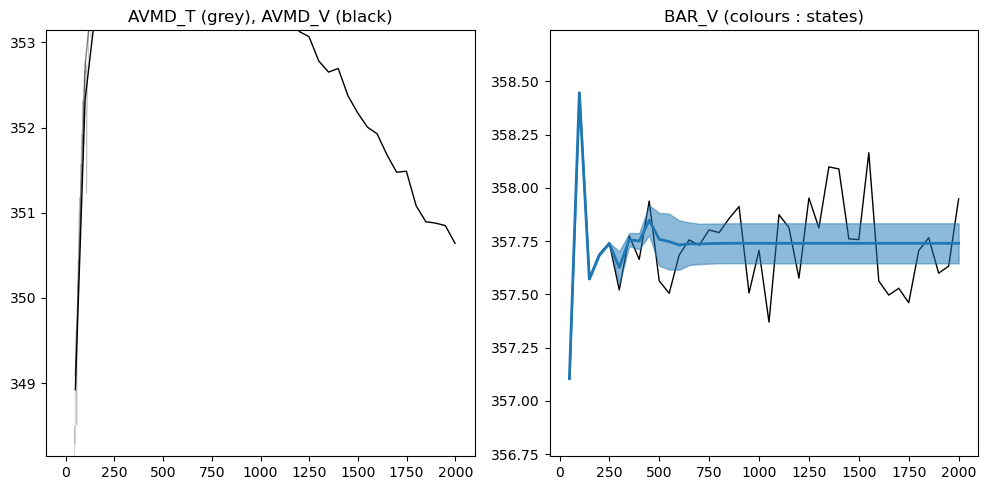

training time so far: 52.05 minutes
saved ./O//NN/training_results/misc/veliparib_I_111_trying_small_dataset_SC__misc_
misc training outputs were saved
saved ./O//NN/training_results/misc/veliparib_I_111_trying_small_dataset_SC__inv_test_
inv_test results were saved


In [10]:
nn.train(   n_batches = 2000,
            save_misc = True,
            save_BAR = True,

            evaluate_on_training_data = True, # *also on training data. very optional just to see overfit BAR (i.e., BAR_T)
            test_inverse = True,              # optional
            f_halfwindow_visualisation = [2.5, 1.],
        )

In [16]:
nn.load_misc_()

In [17]:
nn.estimates.shape

(1, 40, 13)

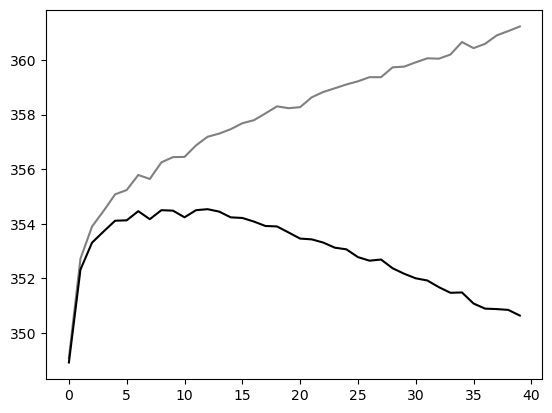

In [18]:
# black: training loss
# grey: validation loss
plt.plot(nn.estimates[0,:,0]/nn.model.n_mol, color='grey')
plt.plot(nn.estimates[0,:,1]/nn.model.n_mol,color='black')

In [14]:
nn.solve_BAR_using_pymbar_(rerun=True)

Failed to reach a solution to within tolerance with hybr: trying next method


39
saved ./O//NN/training_results/BAR/veliparib_I_111_trying_small_dataset_SC__BAR__BAR_output_crystal_index=0
saved BAR result


2861.91520994831 +/- 0.7527387395017895 final: 2861.915209948309 +/- 0.7795508659329574


"\neven 60000 datapoints can get result: 2861.790303567054/8 = 357.724 ~ (357.723 kT in the paper)\nbut the standard error is higher   :  0.846/0.106         =   0.106 > (  0.036 kT in the paper)\n \nNB: with more data (original full dataset, not 'CUT'), the black curve above reaches AVMD_V > 355.5 --> ~ 0.035 kT standard error\n    One could replicate this by running a long simulation initialised from the same *_equilibrated_* PDB file:\n        This PDB = load_pickle_(path_datasets)['args_initialise_object']['PDB']\n        ; path_dataset = './O/MM/GAFF_sc/veliparib/data/veliparib_dataset_I_NVT_cell_111_CUT'\n        a minimal example of extending the current dataset would be: \n            sc = SingleComponent.initialise_from_save_(path_datasets)\n            sc.run_simulation_(...)\n            sc.save_simulation_data_('./O/MM/GAFF_sc/veliparib/data/veliparib_dataset_I_NVT_cell_111_EXTENDED')\n"

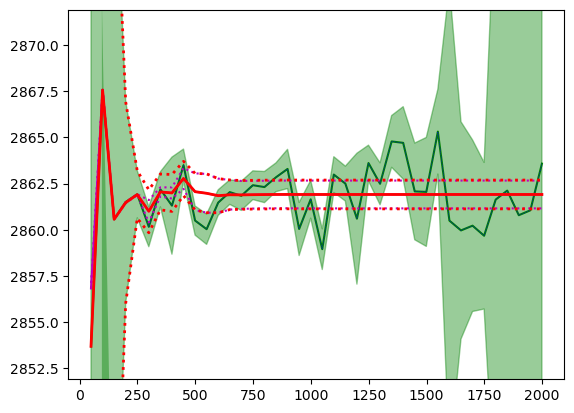

In [15]:
# 'red'   : averaged FE and averaged standard error
# 'm'     : averaged FE and averaged standard deviation
# 'green' : raw FE and raw standard error

nn.plot_result_(window=10)

'''
even 60000 datapoints can get result: 2861.790303567054/8 = 357.724 ~ (357.723 kT in the paper)
but the standard error is higher   :  0.846/0.106         =   0.106 > (  0.036 kT in the paper)
 
NB: with more data (original full dataset, not 'CUT'), the black curve above reaches AVMD_V > 355.5 --> ~ 0.035 kT standard error
    One could replicate this by running a long simulation initialised from the same *_equilibrated_* PDB file:
        This PDB = load_pickle_(path_datasets)['args_initialise_object']['PDB']
        ; path_dataset = './O/MM/GAFF_sc/veliparib/data/veliparib_dataset_I_NVT_cell_111_CUT'
        a minimal example of extending the current dataset would be: 
            sc = SingleComponent.initialise_from_save_(path_datasets)
            sc.run_simulation_(...)
            sc.save_simulation_data_('./O/MM/GAFF_sc/veliparib/data/veliparib_dataset_I_NVT_cell_111_EXTENDED')
'''

In [2]:
2861.790303567054/8, 0.8455139773968108/8

(357.7237879458817, 0.10568924717460135)

In [85]:
nn.nns[0].BAR_V_FE, nn.nns[0].BAR_V_SE

(2861.790303567054, 0.8455139773968108)

In [60]:
nn.load_energies_during_training_()

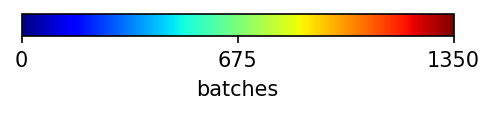

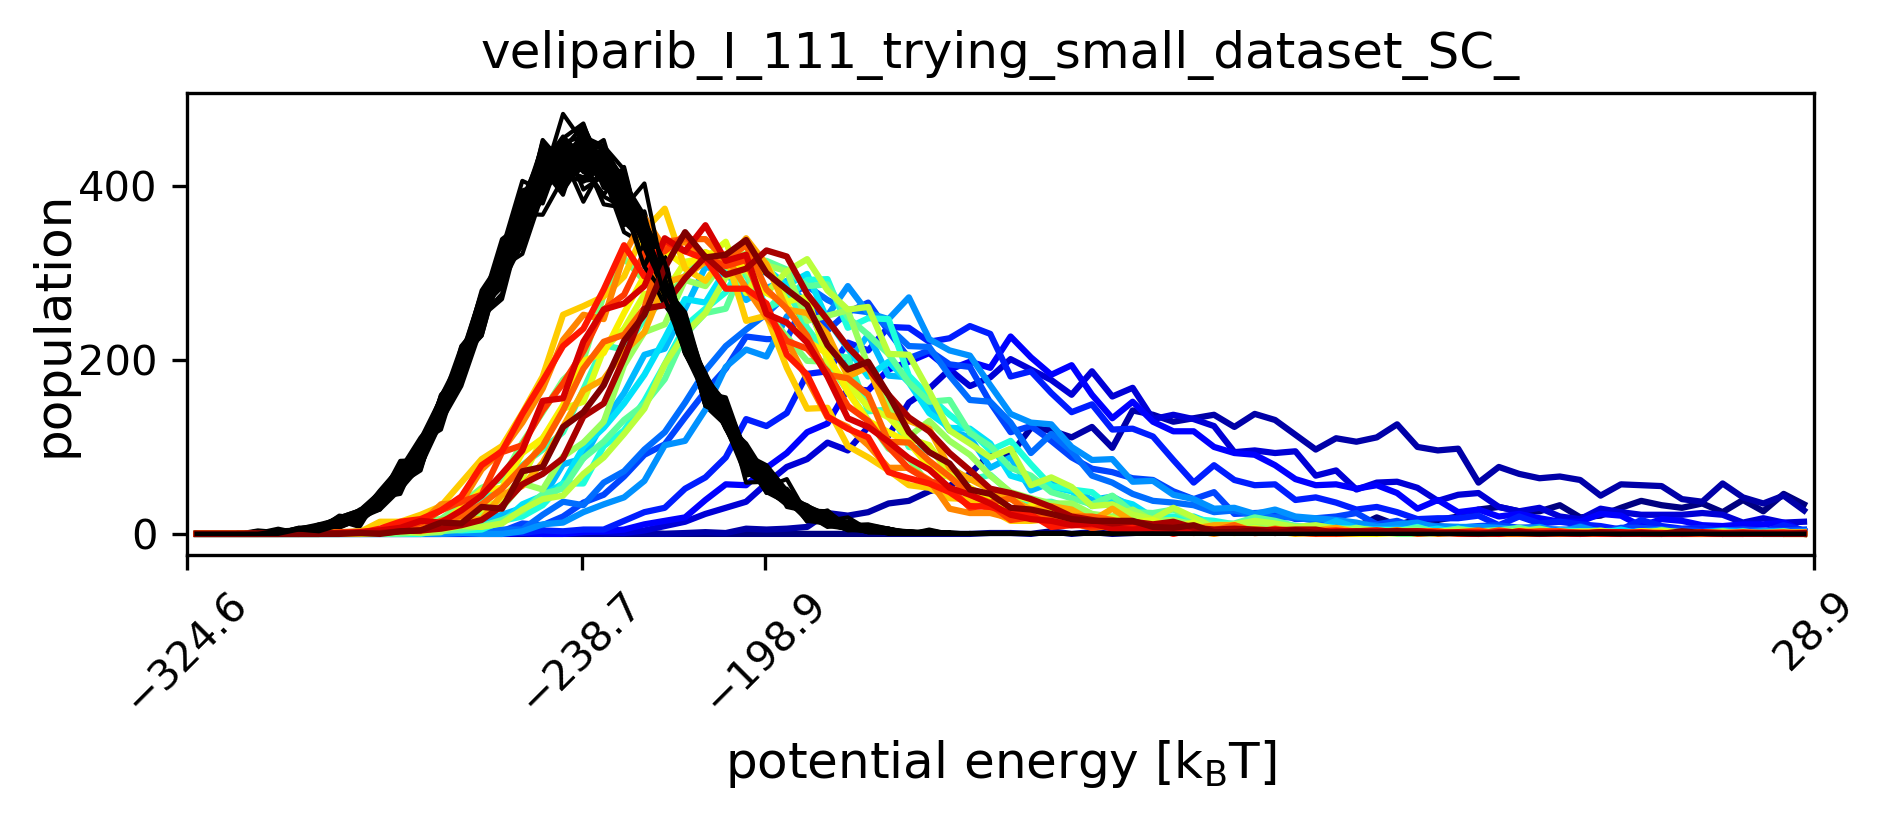

In [62]:
nn.plot_energies_during_training_()

In [29]:
nn.nns[0].r_validation.shape

(12000, 272, 3)

In [40]:
rMD = np.array(nn.nns[0].r_validation)
rBG = nn.sample_model_(15000)[:12000]

In [42]:
rBG.shape

(12000, 272, 3)

# samples histogramed: 12000


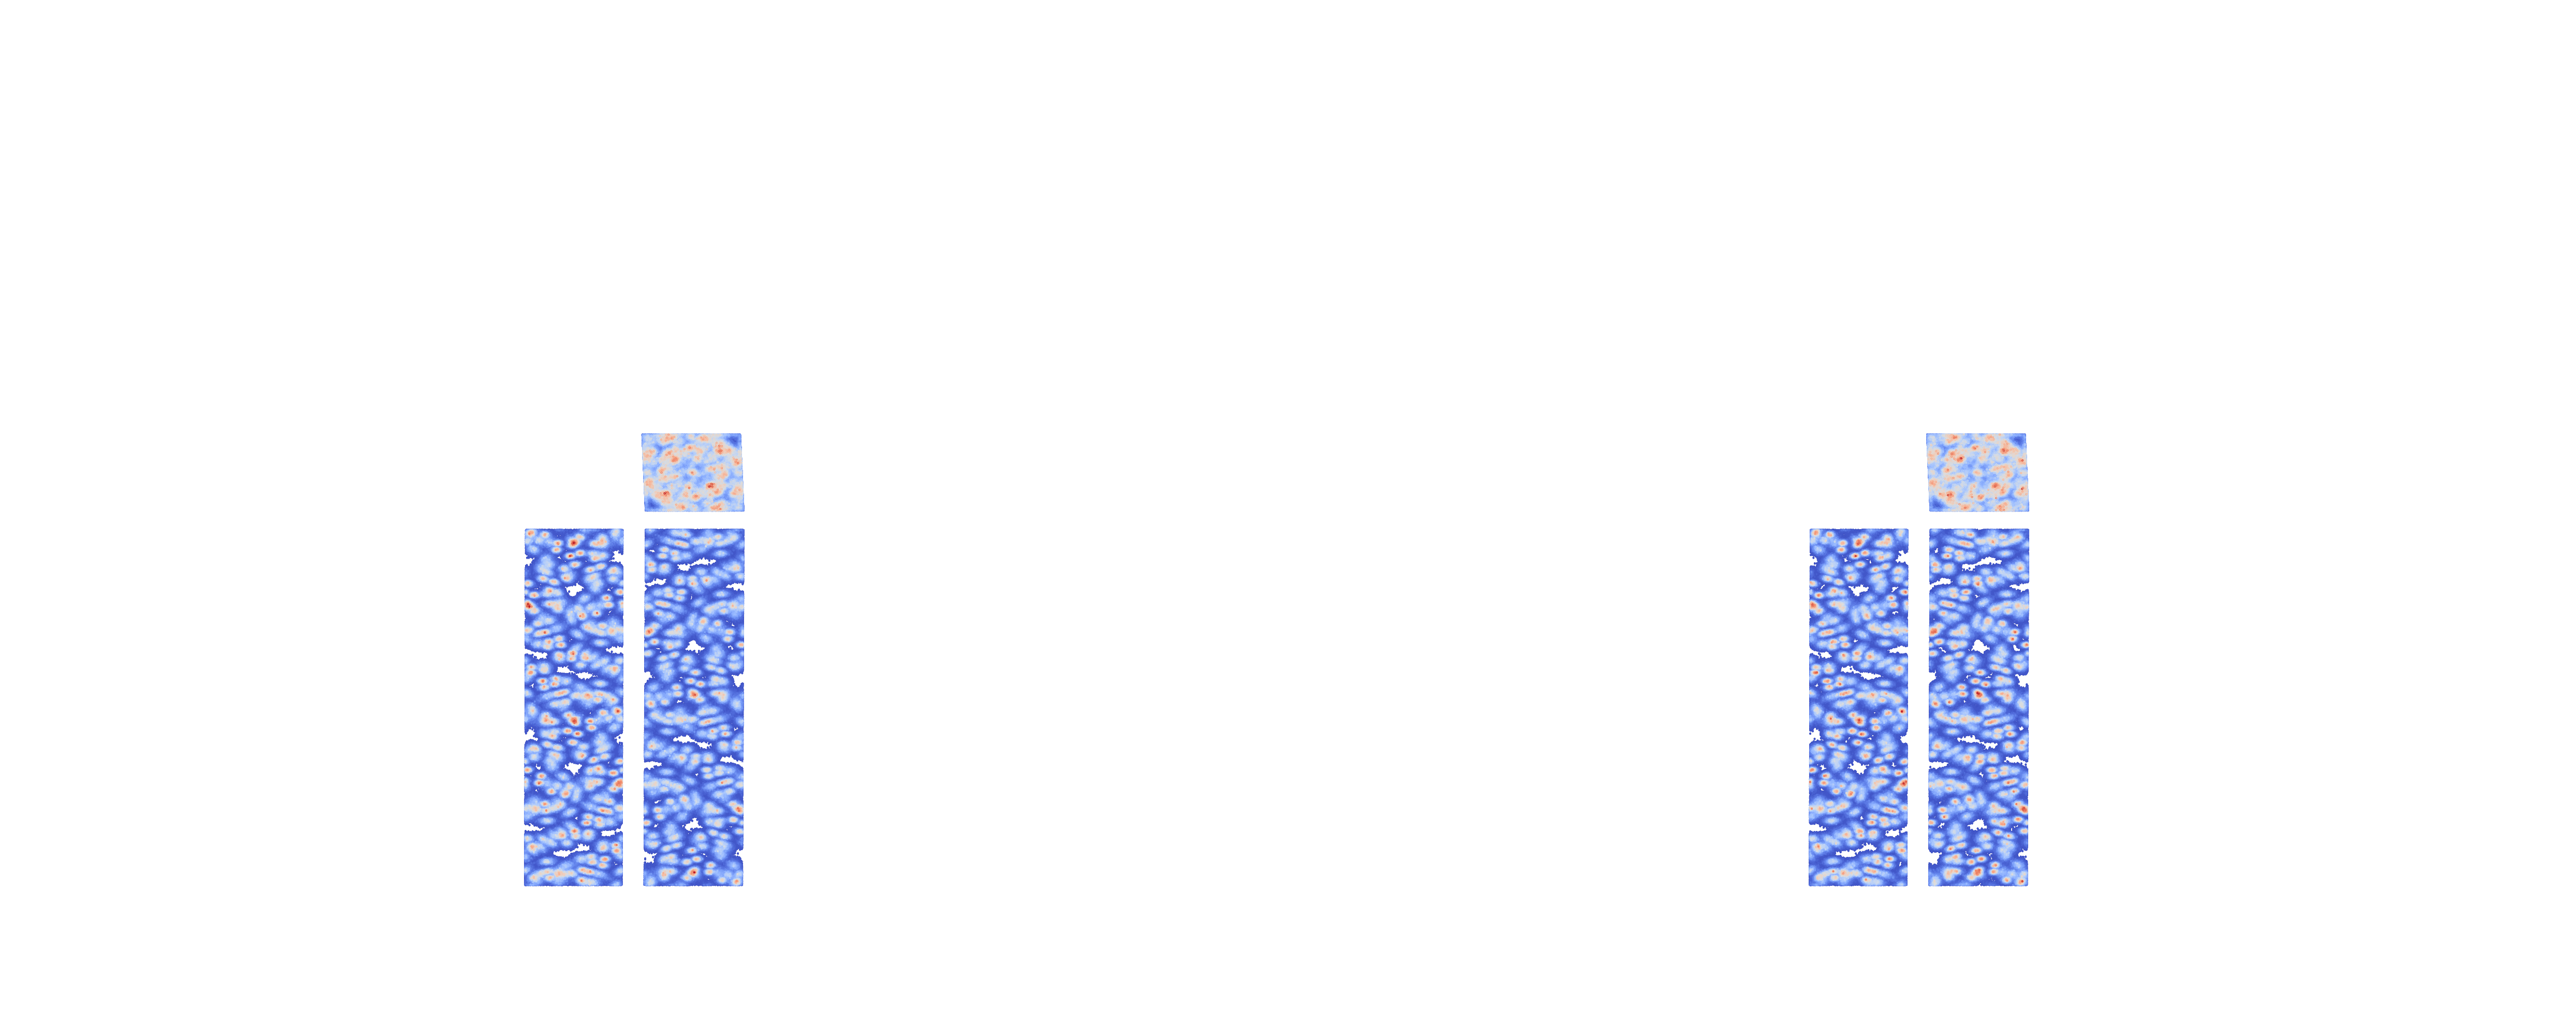

In [70]:
# MD histograms on the left, and histograms from samples out of the model on the right:

plot_2D_histograms_of_box_(b = nn.nns[0].b0,
                           r0 = rMD,
                           r1 = rBG,
                           bins = 1000,
                           s = 1,
                           levels = 100,
                           cmap = 'coolwarm',
                           dpi = 250, aligment_square = False,
                           scatter = False)

In [ ]:
# forgot to show untrained model histogram in xyz:

In [72]:
nn.set_model(n_layers = 4, learning_rate=0.001, n_att_heads=4, evaluation_batch_size=5000)

self.n_att_heads: 4
There are 9423080 trainable parameters in this model, among 324 trainable weights.
[To see dimensionalities of the trainable weights print(list(self.shapes_trainable_weights)).] 
inv_test_res0 ([[9.57338e-06, 0.00015425682], [-4.555664e-05, -0.02734375, 0.024902344]], [[[0.00045166517, 0.018589258], [6.814161e-05, 1.9999776]], [-0.00038291016, -0.12597656, 0.107421875]])


In [75]:
rBG0 = nn.sample_model_(15000)[:12000]

In [77]:
rBG.shape

(12000, 272, 3)

# samples histogramed: 12000


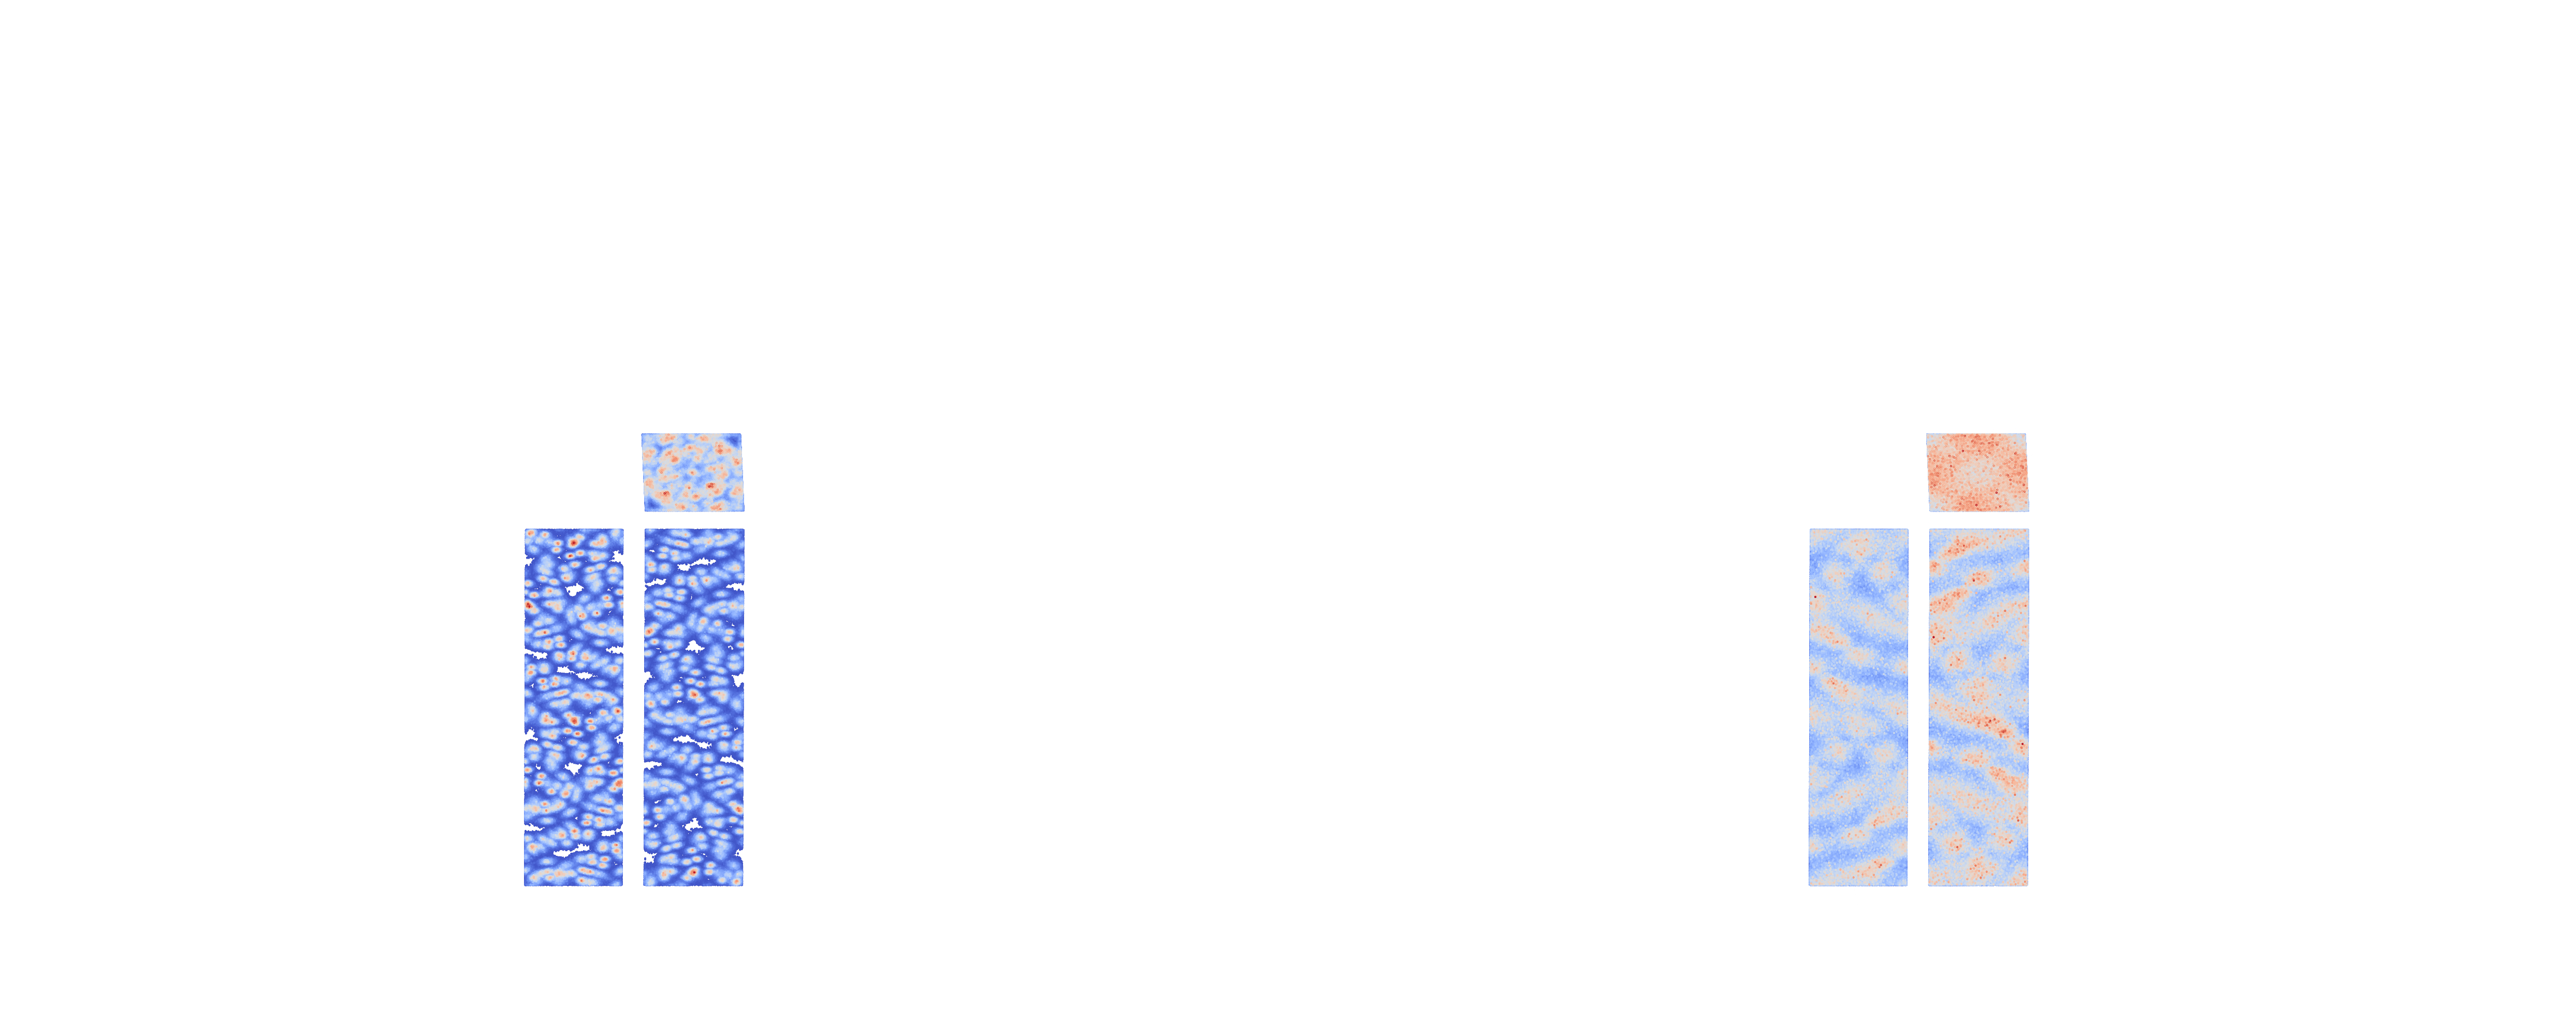

In [76]:
# MD histograms on the left, and histograms from samples out of the model on the right:

plot_2D_histograms_of_box_(b = nn.nns[0].b0,
                           r0 = rMD,
                           r1 = rBG0,
                           bins = 1000,
                           s = 1,
                           levels = 100,
                           cmap = 'coolwarm',
                           dpi = 250, aligment_square = False,
                           scatter = False)